<div style="width:100%;border-collapse:separate;border:solid 2px;border-radius:14px;">
    <div style="display:flex;">
        <div style="display:inline;width:5%;"></div>
        <div style="display:inline;width:15%;">NSI1</div>
        <div style="display:inline;width:15%;">25b</div>
        <div style="display:inline;width:70%;text-align:right;"><b>Algorithmique</b></div>
        <div style="display:inline;width:5%;"></div>
    </div>
    <div  style="display: flex;background-color:#EEE">
        <p style="width:100%;text-align:center;">Algorithme des k plus proches voisins</p>
    </div>
    <div  style="display: flex;">
        <p style="width:100%;text-align:center;">Développement, exemples d'application et conclusion</p>
    </div>
</div>

<div class = "alert alert-success">
    
**Objectifs de la séquence:**  
Initiation à un algorithme d'apprentissage: Une approche de l'intelligence artificelle.    
Prédire la classe d’un élément.  


<div class = "alert alert-info">
    
**Sommaire :**

- <a href=#Resume>Résumé de l'épisode précédent</a> 
- <a href=#Distance_euclidienne>Calcul de distance euclidienne</a> 
- <a href=#Ordre_et_choix>Mettre de l'ordre et faire un choix</a> 
- <a href=#Frontieres_decision>Frontières de décision</a> 
- <a href=#Exemple_applications>Exemples d'applications</a>  
- <a href=#Conclusion>Conclusion</a>

![Starting block](https://github.com/ebuonocore/NSI1_25_knn/blob/master/images/NSI1_25b_1nn_Vornoi.jpg?raw=true)
<span style="font-family:Comic Sans MS; color:gray; font-size: x-small;float:right ">Source: 
<a href ="https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/">kevinzakka.github.io</a></span> 

<div id="Resume"></div>

# Résumé de l'épisode précédent

<div class = "alert alert-success">

Afin d'estimer la classe d'un **candidat** , nous avons vu qu'il faut:
- calculer les distances entre le candidat et les autres objets
- conserver la liste des k objets les plus proches
- parmi ces k objets, recenser la classe la plus présente</div>

<div id="Distance_euclidienne"></div>

# Calcul de distance euclidienne

La fonction `distance()` prend 2 couples de flottants en paramètres:  
A = ( xa, ya) et B = (xb   , yb)  
Elle renvoie la disance euclidienne entre ces deux points

In [1]:
from math import sqrt
def distance (A,B):
    """ tuple * tuple -> float
    Préconditions: A et B sont des couples de flottants représentants les coordonnées des points
    Renvoie la distance entre A et B
    """
    xa = A [0] # xa et ya prennent les valeurs de l'abscisse et de l'ordonnée de A
    ya = A [1] 
    xb = B [0] # xb et yb prennent les valeurs de l'abscisse et de l'ordonnée de B
    yb = B [1]
    return sqrt((xb-xa)**2+(yb-ya)**2)

**Q1:** Utilisez cette fonction pour calculer la distance entre les points de coordonées (-1,0) et (0,1)

In [2]:
distance((-1,0) , (0,1))

1.4142135623730951

On note `E` la liste des individus de la population existante (C'est à dire, les coquelicots et les bleuets déjà éclos)  
Chaque élément de la liste est un p-uplet: Les deux premiers paramètres représentent les coordonnées dans le repère et le troisième la classe de l'objet:  
`'C'` correspond à un coquelicot  
`'B'` à un bleuet

Exemple: un_element_de_la_population = ( abscisse, ordonnée, classe )

In [3]:
E = [] # Initialisation de la liste des individus
E.append( (2.200, 1.200 , 'B') ) # Ajout des différents individus
E.append( (1.370, 0.721 , 'C') ) # Chaque individu est représenté par un 3-uplet(float, float, int) 
E.append( (1.555, 0.649 , 'C') )
E.append( (2.160, 0.567 , 'B') )
E.append( (2.506, 0.587 , 'C') )
E.append( (2.432, 3.134 , 'B') )
E.append( (1.500, 2.175 , 'C') )
E.append( (3.493, 1.432 , 'B') )
E.append( (3.913, 1.000 , 'B') )

**Q2:** Quelle est l'instruction qui permet de récupérer le deuxième **élément** de la liste: `(1.370, 0.721 , 'C')`

In [4]:
E[1]

(1.37, 0.721, 'C')

**Q3:** Quelle est l'instruction qui permet de récupérer la **classe** du deuxième élément de la liste: `'C'`

In [5]:
E[1][2]

'C'

**Q4:** Dans la fonction suivante, complétez le code de couleur manquant 

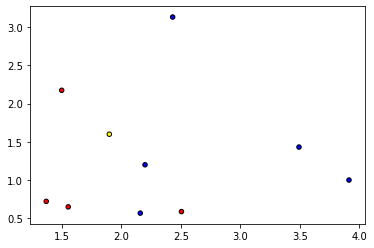

In [6]:
import matplotlib.pyplot as plt
""" Le programme suivant dessine les points de l'ensemble E et le candidat dans le plan
    L'instruction plt.scatter() qui dessine ce graphique, prend en paramètres les listes
    abscisses, ordonnées et couleurs construites à partir des paramètres des points à représenter 
"""
fleur_mystere = (1.9,1.6)
abscisses = [fleur_mystere[0]]  # Initialisation des listes 'abscisses', 'ordonnées' et 'couleurs',
ordonnées = [fleur_mystere[1]] # avec les paramètres de la fleur mystère (le candidat)
couleurs = ['#ffff00'] # Couleur Jaune = Rouge + Vert (pas de Bleu)
for individu in E: # Pour chaque élément de l'ensemble E (les coquelicots et le bleuets éclos)
    abscisses.append(individu[0]) # On ajoute les paramètres aux listes 'abscisses', 'ordonnées' et 'couleurs'
    ordonnées.append(individu[1])
    if individu[2] == 'C': 
        couleurs.append('#ff0000') # Couleur Rouge
    elif individu[2] == 'B':
        couleurs.append('#0000ff') # Couleur Bleue
    elif individu[2] == 'V':
        couleurs.append('#00ff00') # Couleur Verte
    else:
        couleurs.append( '#444444') # Sinon, couleur Grise
# On affiche chaque point mémorisé avec ses coordonnées et la couleur propre à sa classe.        
plt.scatter(abscisses, ordonnées, c = couleurs,edgecolor = '#000000', alpha = 1, s = 20)

Le schéma ci-dessous donne une représentation de la succession des traitements des données que nous allons réaliser:
- `liste_distances()` prend en paramètres l'ensemble des objets connus et la position du candidat. Elle génère la liste des couples (distance par rapport au candidat, classe)
- `k_plus_proches()` prend en paramètres la liste des couples et l'entier k. Elle  renvoie les k plus proches éléments.
- `classe_predite()` désigne la classe majoritairement représentée dans la liste prise en paramètre.

![Liste des fonctions](https://github.com/ebuonocore/NSI1_25_knn/blob/master/images/fonctions_knn2.png?raw=true)

<div id="Ordre_et_choix"></div>

# Mettre de l'ordre et faire un choix


Connaissant une **population** d'individus (liste E) et la position du **candidat**, nous souhaitons construire la fonction qui renvoie une **liste de couples** où chaque élément de E est représenté par sa distance par rapport au candidat et sa classe.  
**Q5:** Complétez la fonction `liste_distances()`

In [7]:
def liste_distances(population, candidat):
    """ list * int * 2-uplet -> list
        renvoie la liste des couples (distance, classe) pour chaque individu
        population est une liste d'individus. Liste de 3-uplets (float, float, classe)
        candidat est un 2-uplet de flottants (coordonnées du candidat)
    """
    liste_retour = [] # Initialisation de la liste à construire
    xa = candidat[0] # Coordonnées du candidat (xa,ya)
    ya = candidat[1]
    for individu in population: # Pour chaque individu de l'ensemble E
        xi = individu[0] # Abscisse de l'individu
        yi = individu[1] # Ordonnée de l'individu
        classe = individu[2] # Classe de l'individu
        eloignement = distance ((xa,ya) , (xi,yi)) # Calcul de la distance en utilisant la fonction précédente
        liste_retour.append( (eloignement, classe) ) # Ajout du couple (distance, classe) dans la liste
    return liste_retour

In [8]:
fleur_mystere = (1.9,1.6)
liste_distances(E, fleur_mystere)

[(0.5000000000000002, 'B'),
 (1.0264214534001128, 'C'),
 (1.0116451947199672, 'C'),
 (1.0652178181010683, 'B'),
 (1.1804257706437962, 'C'),
 (1.6236317316436013, 'B'),
 (0.7004462863060947, 'C'),
 (1.601834261089455, 'B'),
 (2.1005163650874037, 'B')]

Maintenant, nous disposons, pour chaque élément de sa distance par rapport au candidat et de sa classe.  
Nous allons trier cette liste dans l'ordre des distances croissantes et ne conserver que les k plus proches éléments.  
**Q6:** Complétez la liste en compréhension de la fonction suivante

In [11]:
def k_plus_proches(couples_distances_classes, k):
    """ Classe les couples de la liste liste_distances dans l'ordre des distances croissantes
        Renvoie la liste des k couples les plus petites
        couples_distances_classes est une liste de couples: (distance, classe) 
        k est un entier
    """
    liste_triee = sorted(couples_distances_classes) # Par défaut les couples sont triés selon le premier paramètre (la distance)
    liste_retour = [liste_triee[i] for i in range(k)] # liste_retour ne conserve que les k premiers éléments
    return liste_retour

In [19]:
fleur_mystere = (1.9,1.6) # Définition du candidat
couples_distances_classes = liste_distances(E, fleur_mystere) # Construction des couples (distance,classe)
k_plus_proches(couples_distances_classes, 5) # Liste des k plus proches voisins

[(0.5000000000000002, 'B'),
 (0.7004462863060947, 'C'),
 (1.0116451947199672, 'C'),
 (1.0264214534001128, 'C'),
 (1.0652178181010683, 'B')]

**Q7:** Exécutez à nouveau la cellule ci-dessus en paramétrant l'appel de la fonction `k_plus_proches()` pour ne faire apparaitre que les 5 plus proches. Cela vous permettra de vérifier aussi si votre fonction est bien programmée.

Connaissant la liste des k plus proches voisins, il ne reste plus qu'à renvoyer la classe majoritaire.  
Complétez la fonction suivante:

In [20]:
def  classe_predite(plus_proches):
    dictionnaire_classe = {} # Initialisation du dictionnaire. Clef = Classe, Valeur = nombre d'occurences
    maximum = 0 # Initialisation du maximum
    for individu in plus_proches: # On parcourt les k plus proches couples (distance, classe)
        classe_individu = individu[1] # On récupère la classe de cet individu
        if classe_individu in dictionnaire_classe.keys(): # Si cette occurence exite déjà dans le dictionnaire
            dictionnaire_classe[classe_individu] += 1  # Incrémente la valeur de cette clef
        else :
            dictionnaire_classe[classe_individu] = 1 # Sinon, créé cette nouvelle clef avec valeur=1
        if dictionnaire_classe[classe_individu] > maximum: # Si on bat le record de représentation,
            maximum = dictionnaire_classe[classe_individu] # on mémorise le score,
            classe_majoritaire = classe_individu # et le nom de cette classe majoritaire jusque là
    #print("La classe majoritaire",classe_majoritaire,"est représentée",maximum,"fois")
    return classe_majoritaire

In [21]:
fleur_mystere = (1.9,1.6) # Définition du candidat
couples_distances_classes = liste_distances(E, fleur_mystere) # Construction des couples (distance,classe)
plus_proches = k_plus_proches(couples_distances_classes, 4) # Liste des k plus proches voisins
classe_predite(plus_proches) # Désigne la classe majritaire parmi les k plus proches voisins

'C'

Au final, nous avons tous les outils en main:
Soit `E`, la population d'individus connus,  
- `distance (A,B)` permet de calculer la distance entre 2 points 
- `liste_distances(population, candidat)` renvoie une liste de couples (distance par rapport au candidat, classe de l'individu)
- `k_plus_proches(couples_distances_classes, k)` trie cette liste et renvoie les k éléments plus proches
- `classe_predite(plus_proches)` renvoie la classe majoritaire parmi la liste `plus_proches`

Pour synthétiser tout cela, on définie la fonction `k_nn` qui prend en paramètre la population `E`, la position du `candidat`, l'entier `k` et renvoie une prédiction pour la classe du **candidat**.  
**Q8:** Complétez les paramètres des fonctions. (Les définitions de fonctions plus haut peuvent aider à répondre)

In [22]:
def k_nn(population, candidat, k):
    """ Renvoie une prédiction de la calsse de l'individu candidat
        population est une liste d'individus. Liste de 3-uplets (float, float, classe)
        candidat est un couple de flottants (abscisse, ordonnée)
        k est un entier
    """
    couples_distances_classes = liste_distances(population, candidat)
    plus_proches = k_plus_proches(couples_distances_classes, k)
    prediction = classe_predite(plus_proches)
    return prediction

Exécutez les lignes suivantes pour différentes valeurs de `k`: de 1 à 9
Que remarquez-vous?

In [29]:
fleur_mystere = (1.9,1.6)
k_nn (E,fleur_mystere, 9)

'B'

**Q9:** Ecrivez vos observations dans cette cellule : La prédiction change en fonction de la valeur de k

Pourquoi dans cet exemple, le choix de 2 ou 6 comme valeur de `k` n'est pas judicieux? Le résultat est-il valable?

**Q10:** Ecrivez votre commentaire dans cette cellule :  
Pour k=2, 1 bleuet et 1 coquelicot parmi les 2 voisins.  
Pour k=6, 3 bleuet et 3 coquelicot parmi les 6 voisins. 
Lorsqu'il y a égalité entre les classes à départager il ne peut y avoir de majorité. La valeur renvoyée n'est pas représentative.

<div id="Frontieres_decision"></div>

# Frontières de décision

Pour une valeur de `k` donnée, on peut interroger l'algorithme pour chaque point du plan.  
Si l'on représente graphiquement ces réponses, on voit se dessiner des zones distinctes d'appaition prévue de bleuets ou de coquelicots et des frontières entre ces zones.  
Ci-dessous, pour 4 différentes valeurs de `k`, on voit comment évolue le tracé de ces **frontières de décision**. On rertouve aussi la position de notre fleur candidate (en jaune) qui est au centre du disque qui contient les k plus proches voisins.  

![Frontieres_de_decision_Npetit](https://github.com/ebuonocore/NSI1_25_knn/blob/master/images/frontieres_decision_3.jpg?raw=true)

Avec `k=1` chaque zone inclue les individus de sa classe: Tous les individus bleus sont dans des zones bleues. Et tous les individus rouges sont dans les zones rouges.  
Lorsque `k` grandit, Les contours des zones de décision ont tendance à s'adoucir. Des individus d'une couleur peuvent se retrouver dans une zone d'une autre couleur. Ils sont comme des exceptions de la règle générale qui se dégage de l'algorithme.  
Mais notre ensemble de départ n'est peut être pas assez complet. Généralement, il va falloir l'alimenter par une sélection d'individus plus large. Dans ce cas, nous serions sans doute dans une situation de **sous-apprentissage**.

Voilà à quoi cela ressemble avec davantage "d'expériences" pour alimenter l'algorithme.

![Frontieres_de_decision_N_grand](https://github.com/ebuonocore/NSI1_25_knn/blob/master/images/frontieres_decision_4.jpg?raw=true)

A l'inverse, il existe un autre écueil: Le **sur-apprentissage** (overfitting en anglais): Avec un trop grand nombre d'expériences, votre algorithme ne fera que "coller" au **jeu d'entraînement** sans permettre de dégager une tendance générale pertinente.

<div id="Exemple_applications"></div>

# Exemples d'applications


L'algorithme des **k plus proches voisins** ne sert a priori pas à deviner la nature des fleurs qui poussent.  
Il est très utilisé dans des domaines divers comme:
- La génétique (prédiction de la fonction   de gènes)
- l'agriculture (mais pas que des fleurs)
- les transports (prédiction de trafic)
- la sécurité

Imaginons un jeu de stratégie:  
A un moment donné, l'ordinateur qui joue un des opposant doit faire le choix d'adopter un comportement **agressif**, **défensif** ou de **développement** en créant des bâtiments par exemple.  


![Orcs_vs_humans](https://github.com/ebuonocore/NSI1_25_knn/blob/master/images/Orcs_vs_humans2.jpg?raw=true)
<span style="font-family:Comic Sans MS; color:gray; font-size: x-small;float:right ">Source: D'après 
<a href ="https://www.freepng.fr/">freepng.fr</a> et <a href ="https://pixabay.com/">pixabay.com/</a></span> 


Pour faire son choix, il dispose de deux informations:  
- un paramètre reflétant le potentiel offensif de ces unités : noté **'Attaque'**
- un paramètre reflétant le potentiel défensif de ces bâtiments: noté **'Défense'**  

On fait tourner le jeu sur un grand nombre de parties, et on note quel choix a été fait arbitrairement au bout de 10 minutes de jeu.  
On représente sur un graphique les parties qui ont abouties à une **victoire**.  
- En abscisse, la valeur d'**Attaque**.  
- En ordonnée, la valeur de **Défense**.  
- La classe du point correspond au choix qui a conduit à la victoire.

Voila à quoi ressemble l'analyse de ces parties avec l'algorithme des **k plus proches voisins** pour un `k=7`
![Orcs_vs_humans_knn](https://github.com/ebuonocore/NSI1_25_knn/blob/master/images/Orcs_vs_humans_knn.jpg?raw=true)
**Q11:** D'après ce graphique, quels choix devra faire l'ordinateur s'il se trouve dans les situations suivantes:

Partie A: Attaque = 50, Défense = 25
-> Choix stratégique: Construction de bâtiments

Partie B: Attaque = 150, Défense =150
-> Choix stratégique: Agressif

Partie C: Attaque = 75, Défense =100
-> Choix stratégique: Défensif

Partie D: Attaque = 100, Défense =100 (Point jaune)
-> Choix stratégique: Agressif

<div id="Conclusion"></div>

# Conclusion

Nous avons vu comment réaliser l'algorithme des **k plus proches voisins**, mais la grosse difficulté résidera souvent dans le réglage de la taille du jeux d'entraînement et de la valeur de `k` afin d'obtenir des prédictions et un taux d'erreurs satisfaisant.

N'oublions pas que ces prédictions sont statistiques: certaines seront fausses.  
Par définition, un phénomène soumis à l'aléa ne peut pas être complétement prévisible.  
Vous en avez fait l'expérience pendant le sondage.

Et si le choix repose sur plus de deux paramètres, il est tout à fait possible d'utiliser cet algorithme mais les représentations graphiques sont moins lisibles: 3 critères débouchent sur 3 axes et une représentation 3D.

![Fruits en 3D](https://github.com/ebuonocore/NSI1_25_knn/blob/master/images/knn_fruits.jpg?raw=true)
<span style="font-family:Comic Sans MS; color:gray; font-size: x-small;float:right ">Source: D'après 
<a href ="http://www.pianshen.com/article/2839170053/">pianshen.com</a></span> 

Ci dessus un modèle permettant de reconnaître des fruits en fonction des critères:
- largeur
- hauteur
- indice de couleur

---
<p style="font-family:Comic Sans MS; text-align: center; color:gray; font-size: x-small; ">- Eric Buonocore. Mai 2020 -</p>

![Licence CC BY NC SA](https://licensebuttons.net/l/by-nc-sa/3.0/88x31.png)